<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Contexto;</li>
  <li>Telegram;</li>
  <li>Dados.</li>
</ol>

---

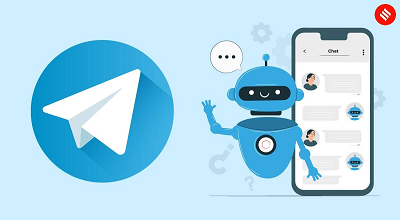 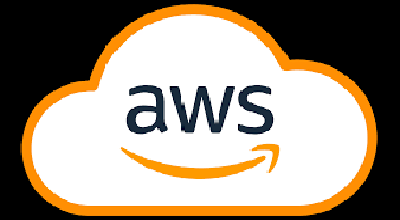

# 1. **Contexto e objetivos:**
## **Projeto Pipeline de Dados usando Telegram e AWS**

### Criar um chatbot no Telegram para que as conversas geradas entre usuários, clientes e empresas sejam armazenadas em uma base de dados AWS para que possam ser recuperadas e processadas atreves de uma API, permitindo analises e gerando insights relevantes para a tomada de decisões que geram valor paras os diversos envolvidos!
### Chatbots são comuns hoje em dia, um exemplo de aplicação é o atendimento aos clientes, auxiliando-os na resolução de problemas ou no esclarecimento de dúvidas sem a necessidade previa de interação humana.

# 2. **Telegram**

### O Telegram é uma plataforma de mensagens instantâneas gratuita de código aberto e muito utilizado por desenvolvedores por ser a pioneira na criação de chatbots que automatizam uma variedade de tarefas.

# **Execução**

### > **Nota:** Esta 1ª parte desde projeto foi realizado todo em Python no VSCODE, pode ser que em alguma parte do código seja necessário ajusta-lo dependendo da IDE...

1.1. Crie uma conta no **Telegram** caso não possua uma e faça o login na versão web da ferramenta através desse [link](https://web.telegram.org).

1.2. Crie um *bot*.

1.3. Crie um grupo e adicione o *bot*.

1.4. Torne o *bot* administrador do grupo.

1.5. Desabilite a opção de adicionar o *bot* a novos grupos.

1.6. Envie diversos tipos de mensagens no grupo (text, imagem, arquivos, video, áudio, etc.) e as consuma utilizando a API de *bots* do **Telegram**.

> **Nota:** A documentação completa da API pode ser encontrada neste [link](https://core.telegram.org/bots/api)

# 3. **Dados**

### **Boot API**

### Boot é o termo em inglês que representa o processo de inicialização ou arranque de um sistema, neste caso os processo da API.
### API é a sigla para Application Programming Interface, que em português significa Interface de Programação de Aplicações. 
### É uma tecnologia que permite que diferentes aplicações, softwares, bancos de dados e sistemas comuniquem-se entre si. 


### Aqui o módulo getpass solicita ao usuário uma senha ou token em um prompt sem exibi-la(senha mascarada) na tela.

In [ ]:
from getpass import getpass

token = getpass()

### Aqui é fornecida a URL da API do telegram + o token de acesso gerado na etapa anterior de getpass liberando o acesso a API

In [ ]:
import json

import requests

base_url = f'https://api.telegram.org/bot{token}'

### Aqui são gerados algumas informações a respeito do bot criado no telegram

In [ ]:
response = requests.get(url=f'{base_url}/getMe')

print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "id": 7588691655,
    "is_bot": true,
    "first_name": "sandro-ebac-m42",
    "username": "sandrom42_bot",
    "can_join_groups": true,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false,
    "has_main_web_app": false
  }
}


### Aqui são recuperadas as mensagens via API enviadas pelos usuários ou clientes ao bot ou grupo criado no telegram

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 219716971,
      "message": {
        "message_id": 7,
        "from": {
          "id": 7823654093,
          "is_bot": false,
          "first_name": "Sandro",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002349392841,
          "title": "group, sandro-ebac-m42",
          "type": "supergroup"
        },
        "date": 1740053094,
        "text": "oi"
      }
    },
    {
      "update_id": 219716972,
      "message": {
        "message_id": 8,
        "from": {
          "id": 7823654093,
          "is_bot": false,
          "first_name": "Sandro",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002349392841,
          "title": "group, sandro-ebac-m42",
          "type": "supergroup"
        },
        "date": 1740053119,
        "photo": [
          {
            "file_id": "AgACAgEAAyEFAASMCOPJAAMGZ7cX-mnZjSQpHcv0W-xLLqLpneMAAjmwMRvfBLlFB-aPwHXLoJsBAAMCAAN

## Habilitar webhook da APT do telegram para conexão com API Gateway da AWS

In [ ]:
import requests

from getpass import getpass

aws_api_gateway_url = getpass()

In [ ]:
response = (requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')) # Acessar url da API do telegram e habilitar webhook
print(json.dumps(json.loads(response.text), indent=2)) # imprimir se habilitação deu certo (True)

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}
